In [74]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [75]:
#Load the dataset 
dataset=pd.read_csv(r"E:\desktop files\Internship Projects\Medical Insurance Price Prediction\insurance.csv")
df=pd.DataFrame(dataset)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
# Step 2: Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [77]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicates if any
df = df.drop_duplicates()


Number of duplicate rows: 1


In [78]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(include=[object])


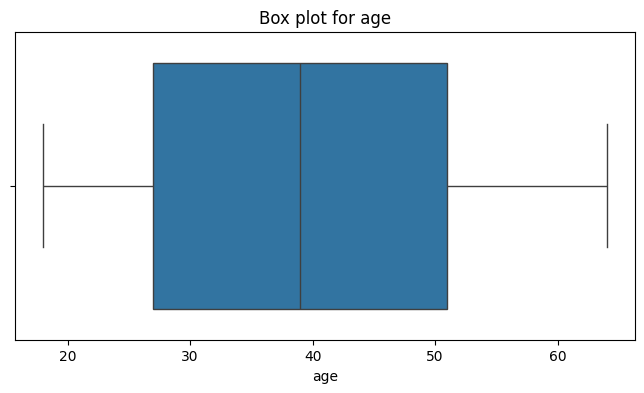

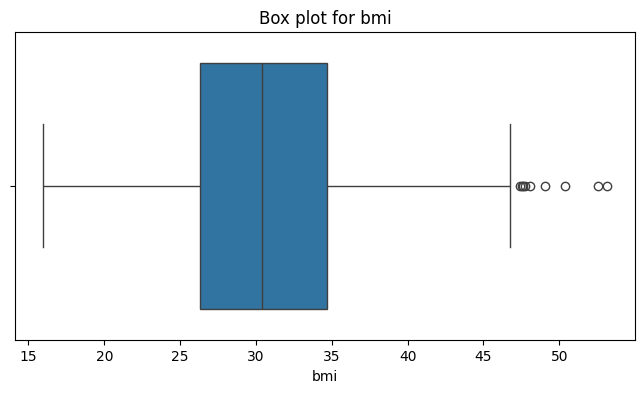

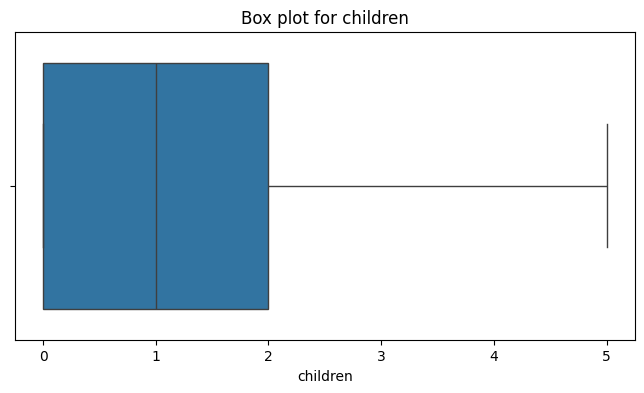

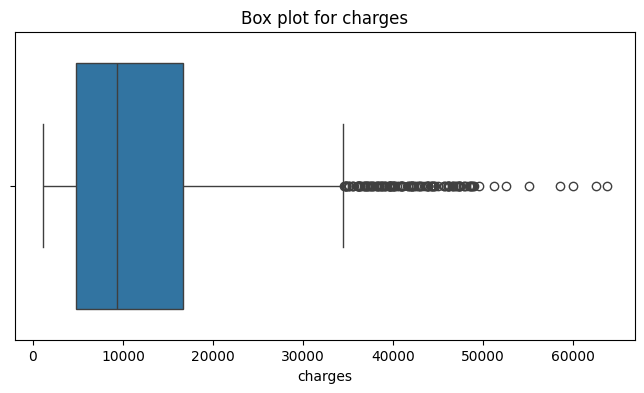

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to plot
numerical_columns = ['age', 'bmi', 'children', 'charges']

# Create box plots for each numerical feature
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box plot for {col}")
    plt.show()


In [80]:
def treat_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where(col < lower_bound, lower_bound, np.where(col > upper_bound, upper_bound, col))

# Apply the IQR method to numerical features
for col in numerical_features.columns:
    df[col] = treat_outliers_iqr(df[col])


Box plots after treating outliers:


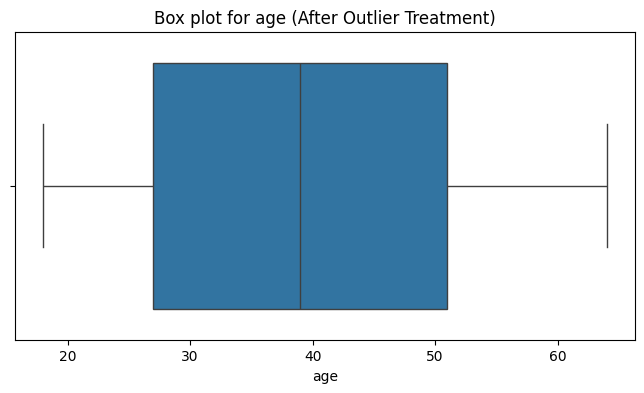

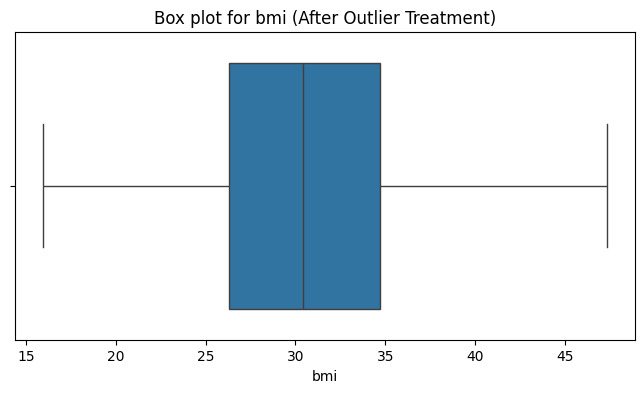

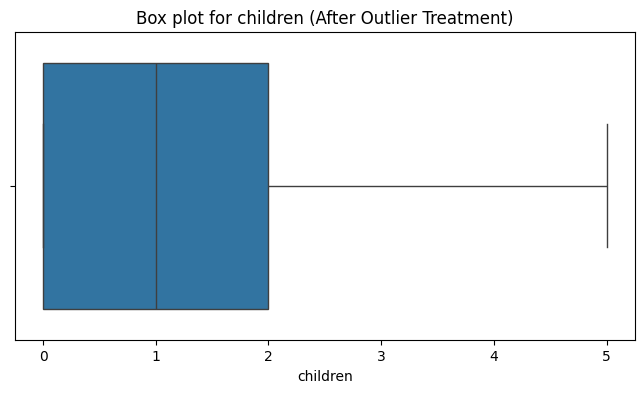

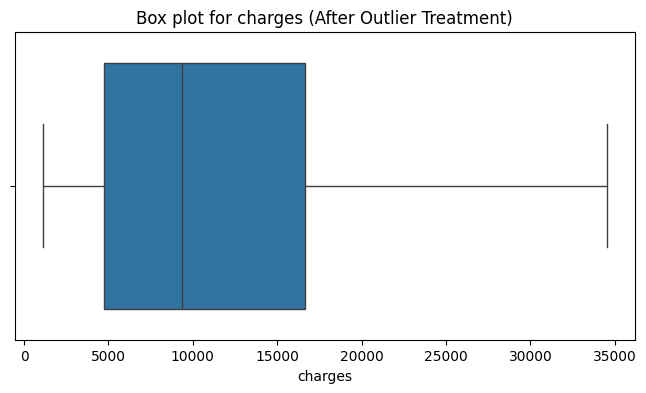

In [81]:
# Box plots after treating outliers
print("Box plots after treating outliers:")
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box plot for {col} (After Outlier Treatment)")
    plt.show()


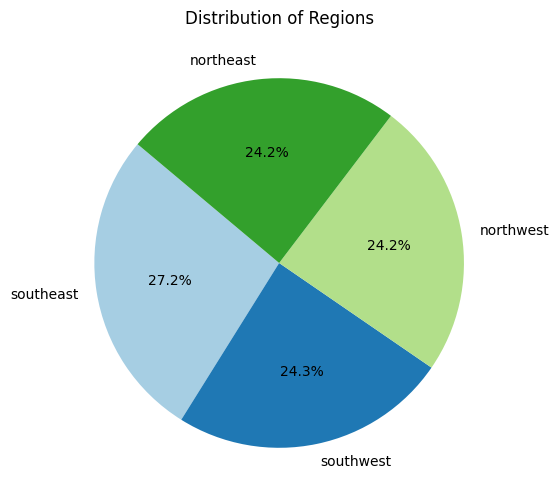

In [82]:
import matplotlib.pyplot as plt

# Sample data for 'region' column (replace this with your actual data)
region_counts = df['region'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Regions')
plt.show()


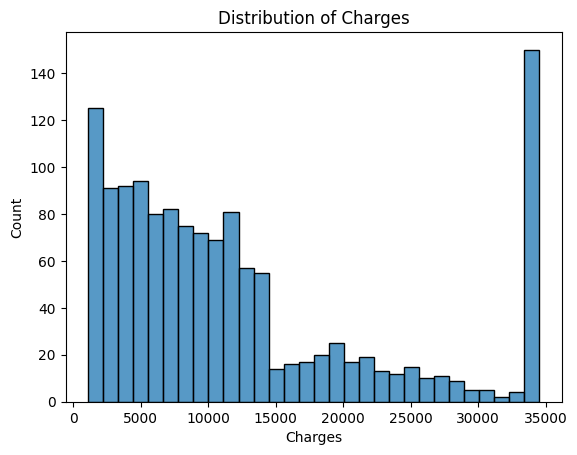

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for 'charges' column (replace with your actual data)
sns.histplot(df['charges'], kde=False, bins=30)

# Setting the labels and title
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Distribution of Charges')
plt.show()


In [84]:
# Step 1: Encoding categorical features
# Encoding 'sex' column
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

# Encoding 'smoker' column
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Encoding 'region' column
region_mapping = {
    'southeast': 0,
    'southwest': 1,
    'northwest': 2,
    'northeast': 3
}
df['region'] = df['region'].map(region_mapping)

# Check the DataFrame to ensure that all columns are numeric
print(df.head())

    age  sex     bmi  children  smoker  region      charges
0  19.0    0  27.900       0.0       1       1  16884.92400
1  18.0    1  33.770       1.0       0       0   1725.55230
2  28.0    1  33.000       3.0       0       0   4449.46200
3  33.0    1  22.705       0.0       0       2  21984.47061
4  32.0    1  28.880       0.0       0       2   3866.85520


Columns in df: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


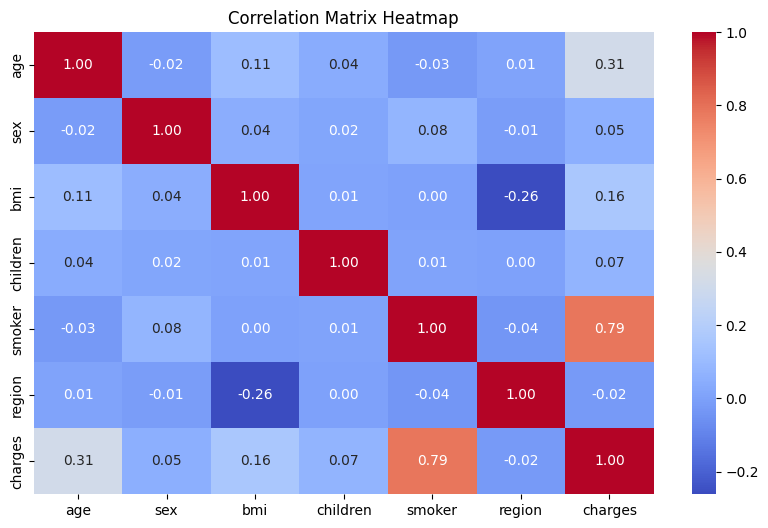

Correlation Matrix:
               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.019814  0.111998  0.041536 -0.025587  0.006833  0.312423
sex      -0.019814  1.000000  0.044831  0.017848  0.076596 -0.013179  0.053211
bmi       0.111998  0.044831  1.000000  0.013692  0.003151 -0.262015  0.161220
children  0.041536  0.017848  0.013692  1.000000  0.007331  0.001533  0.072372
smoker   -0.025587  0.076596  0.003151  0.007331  1.000000 -0.038697  0.786041
region    0.006833 -0.013179 -0.262015  0.001533 -0.038697  1.000000 -0.023632
charges   0.312423  0.053211  0.161220  0.072372  0.786041 -0.023632  1.000000


In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'sex' and 'smoker' columns are in the DataFrame
print("Columns in df:", df.columns)

# Step 2: Calculate the correlation matrix
correlation_matrix = df.corr()

# Step 3: Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


In [86]:
df = df.drop(['children','region'], axis=1)
print(df.columns)

Index(['age', 'sex', 'bmi', 'smoker', 'charges'], dtype='object')


In [87]:
from sklearn.model_selection import train_test_split

# Step 1: Define feature matrix (X) and target variable (y)
X = df.drop(columns=['charges'])  # Features (independent variables)
y = df['charges']  # Target variable

# Step 2: Split the dataset into training and testing sets
# Adjust the test_size (e.g., 0.2 for 20% test data) and random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set X:", X_train.shape)
print("Testing set X:", X_test.shape)
print("Training set y:", y_train.shape)
print("Testing set y:", y_test.shape)


Training set X: (1069, 4)
Testing set X: (268, 4)
Training set y: (1069,)
Testing set y: (268,)


In [88]:
from sklearn.preprocessing import StandardScaler

# Step 1: Initialize the StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Step 2: Fit the scaler on the training data and transform it
X_train_scaled = scaler_X.fit_transform(X_train)

# Reshape y_train to a 2D array (if it is 1D) and scale
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Step 3: Use the same scaler to transform the testing data
X_test_scaled = scaler_X.transform(X_test)

# Reshape y_test to a 2D array (if it is 1D) and scale
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Display the shapes of the scaled datasets
print("Scaled Training set X:", X_train_scaled.shape)
print("Scaled Testing set X:", X_test_scaled.shape)
print("Scaled Training set y:", y_train_scaled.shape)
print("Scaled Testing set y:", y_test_scaled.shape)


Scaled Training set X: (1069, 4)
Scaled Testing set X: (268, 4)
Scaled Training set y: (1069, 1)
Scaled Testing set y: (268, 1)


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Step 1: Initialize the Linear Regression model
model_lr = LinearRegression()

# Step 2: Train the model on the training data
model_lr.fit(X_train_scaled, y_train_scaled)

# Step 3: Make predictions on the testing data
y_pred= model_lr.predict(X_test_scaled)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)

print("Mean Squared Error (MSE) for Linear Regression:", mse)
print("R-squared (R2) for Linear Regression:", r2)
print("Mean Absolute Error (MAE) for Linear Regression:", mae)


Mean Squared Error (MSE) for Linear Regression: 0.21510761294177608
R-squared (R2) for Linear Regression: 0.8163740354121698
Mean Absolute Error (MAE) for Linear Regression: 0.3174225705644169


In [90]:
# Evaluate on training data for LinearRegression Model
y_train_pred = model_lr.predict(X_train_scaled)
train_mse_lr= mean_squared_error(y_train_scaled, y_train_pred)
train_r2_lr= r2_score(y_train_scaled, y_train_pred)
train_mae_lr = mean_absolute_error(y_train_scaled, y_train_pred)

print("Training MSE:", train_mse_lr)
print("Training R²:", train_r2_lr)
print("Training MAE:", train_mae_lr)

# Evaluate on testing data
y_test_pred = model_lr.predict(X_test_scaled)
test_mse_lr= mean_squared_error(y_test_scaled, y_test_pred)
test_r2_lr= r2_score(y_test_scaled, y_test_pred)
test_mae_lr = mean_absolute_error(y_test_scaled, y_test_pred)

print("Testing MSE:", test_mse_lr)
print("Testing R²:", test_r2_lr)
print("Testing MAE:", test_mae_lr)

Training MSE: 0.2784600620501134
Training R²: 0.7215399379498865
Training MAE: 0.34853974081487316
Testing MSE: 0.21510761294177608
Testing R²: 0.8163740354121698
Testing MAE: 0.3174225705644169


In [91]:
from sklearn.ensemble import RandomForestRegressor
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize and train the Random Forest Regressor
model_rfr = RandomForestRegressor(n_estimators=100, random_state=42)
model_rfr.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the testing data
y_test_pred = model_rfr.predict(X_test_scaled)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 17968392.80222655
R-squared (R2): 0.8462316056851179
Mean Absolute Error (MAE): 2250.4363330665665


In [92]:
# Evaluate on training data RandomForestRegressor
y_train_pred = model_rfr.predict(X_train_scaled)
train_mse = mean_squared_error(y_train_scaled, y_train_pred)
train_r2 = r2_score(y_train_scaled, y_train_pred)
train_mae = mean_absolute_error(y_train_scaled, y_train_pred)

print("Training MSE:", train_mse)
print("Training R²:", train_r2)
print("Training MAE:", train_mae)

# Evaluate on testing data
y_test_pred = model_rfr.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, y_test_pred)
test_r2 = r2_score(y_test_scaled, y_test_pred)
test_mae = mean_absolute_error(y_test_scaled, y_test_pred)

print("Testing MSE:", test_mse)
print("Testing R²:", test_r2)
print("Testing MAE:", test_mae)

Training MSE: 242363594.3630353
Training R²: -242363593.36303538
Training MAE: 12431.571843767406
Testing MSE: 278652425.217567
Testing R²: -237870800.80729696
Testing MAE: 13350.836403710142


cross validation

In [93]:
#adaboost 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

# Step 1: Initialize the AdaBoost Regressor
# Use the default DecisionTreeRegressor as the base estimator
model_ada = AdaBoostRegressor(n_estimators=100, random_state=42)

# Step 2: Train the model on the training data
model_ada.fit(X_train_scaled, y_train_scaled)

# Step 3: Make predictions on the training and testing data
y_train_pred_scaled = model_ada.predict(X_train_scaled)
y_test_pred_scaled = model_ada.predict(X_test_scaled)

# If you scaled your target variable, you need to inverse transform the predictions
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Also, reverse transform the actual values if they were scaled
y_train_actual = scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Step 4: Evaluate the model
mse = mean_squared_error(y_test_actual, y_test_pred)
r2 = r2_score(y_test_actual, y_test_pred)
mae = mean_absolute_error(y_test_actual, y_test_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 20234191.22113595
R-squared (R2): 0.8268415473448014
Mean Absolute Error (MAE): 3348.0487724454033


In [94]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("AdaBoost Regressor Evaluation")

# Evaluate on training data
print("Evaluate on training data")
train_mse = mean_squared_error(y_train_actual, y_train_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)
train_mae = mean_absolute_error(y_train_actual, y_train_pred)

print("Training MSE:", train_mse)
print("Training R²:", train_r2)
print("Training MAE:", train_mae)

# Evaluate on testing data
print("Evaluate on testing data")
test_mse = mean_squared_error(y_test_actual, y_test_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)
test_mae = mean_absolute_error(y_test_actual, y_test_pred)

print("Testing MSE:", test_mse)
print("Testing R²:", test_mae)


AdaBoost Regressor Evaluation
Evaluate on training data
Training MSE: 22998793.206005394
Training R²: 0.7694396698178484
Training MAE: 3565.6034800001194
Evaluate on testing data
Testing MSE: 20234191.22113595
Testing R²: 3348.0487724454033


In [95]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the XGBoost Regressor
model_xgb= xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    random_state=42
)

# Train the model
model_xgb.fit(X_train_scaled, y_train_scaled)

# Make predictions
y_train_pred = model_xgb.predict(X_train_scaled)
y_test_pred = model_xgb.predict(X_test_scaled)

# Evaluate on training data
train_mse = mean_squared_error(y_train_scaled, y_train_pred)
train_r2 = r2_score(y_train_scaled, y_train_pred)
train_mae = mean_absolute_error(y_train_scaled, y_train_pred)

print("XGBoost Regressor Training Evaluation")
print("Training MSE:", train_mse)
print("Training R²:", train_r2)
print("Training MAE:", train_mae)

# Evaluate on testing data
test_mse = mean_squared_error(y_test_scaled, y_test_pred)
test_r2 = r2_score(y_test_scaled, y_test_pred)
test_mae = mean_absolute_error(y_test_scaled, y_test_pred)

print("XGBoost Regressor Testing Evaluation")
print("Testing MSE:", test_mse)
print("Testing R²:", test_r2)
print("Testing MAE:", test_mae)


XGBoost Regressor Training Evaluation
Training MSE: 0.013435327556303838
Training R²: 0.9865646724436962
Training MAE: 0.06345076345014777
XGBoost Regressor Testing Evaluation
Testing MSE: 0.21724028174421373
Testing R²: 0.8145534891254144
Testing MAE: 0.2589700460202454


Voting Regressor

In [96]:
#1. Voting Regressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor 

In [97]:
# Initialize the models
model_lr = LinearRegression()
model_rfr = RandomForestRegressor(n_estimators=100, random_state=42)
model_ada = AdaBoostRegressor(n_estimators=100, random_state=42)
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)


In [98]:

# Create a Voting Regressor with the initialized models
voting_regressor = VotingRegressor(estimators=[
    ('lr', model_lr),
    ('rfr', model_rfr),
    ('ada', model_ada),
    ('xgb', model_xgb)
])

# Train the voting regressor on the training data
voting_regressor.fit(X_train_scaled, y_train)

# Make predictions with the voting regressor
y_train_pred = voting_regressor.predict(X_train_scaled)
y_test_pred = voting_regressor.predict(X_test_scaled)


In [99]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

print("Training MSE:", train_mse)
print("Training R²:", train_r2)
print("Training MAE:", train_mae)

# Evaluate on testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Testing MSE:", test_mse)
print("Testing R²:", test_r2)
print("Testing MAE:", test_mae)


Training MSE: 8780471.025111096
Training R²: 0.9119767597990396
Training MAE: 2039.315597652948
Testing MSE: 16180522.590360656
Testing R²: 0.8615316903809489
Testing MAE: 2561.7103250189684


Stacking Regressor

In [100]:
#2..Stacking Regressor
from sklearn.ensemble import StackingRegressor

# Define individual models
# Define individual models
model_lr = LinearRegression()
model_rfr = RandomForestRegressor(random_state=42)
model_ada = AdaBoostRegressor(random_state=42)
model_xgb = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')  # Ensure XGBoost is compatible

# Define the Stacking Regressor with a meta-model (e.g., Linear Regression)
stacking_regressor = StackingRegressor(
    estimators=[
        ('lr', model_lr),
        ('rfr', model_rfr),  # Corrected 'model_rfr' to 'model_rfr'
        ('ada', model_ada),
        ('xgb', model_xgb)
    ],
    final_estimator=XGBRegressor(random_state=42, objective='reg:squarederror')   # You can choose any regressor as the meta-model
)

# Train the ensemble model
stacking_regressor.fit(X_train_scaled, y_train)
# Make predictions
y_pred = stacking_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 22106726.199365273


In [101]:
from sklearn.ensemble import RandomForestRegressor
import pickle
import numpy as np


# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the model
with open('main.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [102]:
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load and preprocess dataset
df = pd.read_csv(r"E:\desktop files\Internship Projects\Medical Insurance Price Prediction\insurance.csv")

df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df = df.drop(columns=['region', 'children'])  # Optional

X = df[['age', 'bmi', 'sex', 'smoker']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# ✅ Save the trained model to main.pkl
with open(r"E:\desktop files\Internship Projects\Medical Insurance Price Prediction\main.pkl", 'wb') as f:
    pickle.dump(model, f)

print("✅ Model trained and saved correctly as 'main.pkl'")


✅ Model trained and saved correctly as 'main.pkl'


In [103]:
import pickle
import numpy as np

# ✅ Load the trained model
with open(r"E:\desktop files\Internship Projects\Medical Insurance Price Prediction\main.pkl", 'rb') as f:
    model = pickle.load(f)

def get_user_input():
    age = float(input("Enter age: "))
    bmi = float(input("Enter BMI: "))
    sex = int(input("Enter sex (0 for Female, 1 for Male): "))
    smoker = int(input("Enter smoker (0 for No, 1 for Yes): "))
    return np.array([[age, bmi, sex, smoker]])

# Predict
user_input = get_user_input()
prediction = model.predict(user_input)
print(f"💰 Predicted Insurance Cost: ₹{prediction[0]:.2f}")


💰 Predicted Insurance Cost: ₹40392.39
